# Introduction to Regression with NN in Tensorfow

There are many definitions for a regression problem, but in this notebook we'll simplify it to predicting a numerical variable based on some other combinations of variables.

In [1]:
# Import tensorflow
import tensorflow as tf
print(tf.__version__)

2.16.2


## Creating some data to view and fit

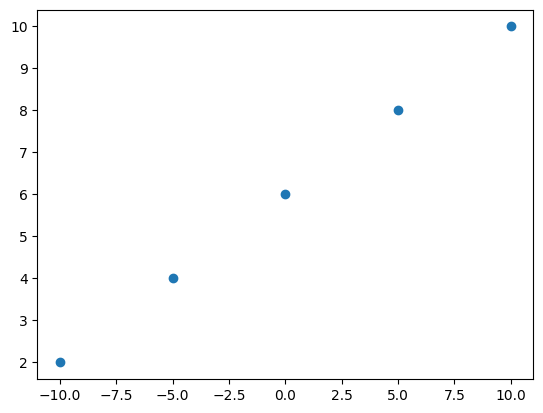

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-10.0, -5.0, 0.0, 5.0, 10.0])

# Create labels
y = np.array([2.0, 4.0, 6.0, 8.0, 10.0])

#Visulaze it
plt.scatter(X,y)

In [12]:
# Convert Numpy arrays into Tensorflow tensors

X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-10.,  -5.,   0.,   5.,  10.])>,
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([ 2.,  4.,  6.,  8., 10.])>)

## Steps in modelling with tensorflow

1. **Creating a model**: Define the input and output layers, as well as the hidden layers.
2. **Compilint the model**: Define the loss function, the optimizer and the evaluation metric.
3. **Fitting a model**: Letting the model try to find patterns between the features and labels

In [25]:
# Setting a random seed for reproducebility
tf.random.set_seed(42)

# 1. Create a model using the sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # We're only implementing 1 neuron because we only want to predict 1 output value from 1 inupt value
])

"""
#Alternative
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))
"""

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae stands for mean absolute error
             optimizer= tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
         metrics=["mae"])

# 3. Fitting the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 7.3191 - mae: 7.3191
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.1555 - mae: 7.1555
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.9919 - mae: 6.9919
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.8283 - mae: 6.8283
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.6647 - mae: 6.6647


In [40]:
# Try and make a prediction with our model
model.predict(np.array([17.0])) # Scalars as inputs are not allowed, the unique valide data structure are arrays

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[ -5.5761476],
       [-65.92468  ]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model.

1. **Crearing a model**: Add more layers, increase the number of hidden units(neurons), change the activation function of each layer
2. **Compilin a model**: Change the optimization function or learning rate of the optimization function
3. **Fitting a model**: Fit a model for more epoch or more data.

**As ML scientist the goal is to run as many experiments as possible to identify what works before scaling up the models**

**The learning rate is the most important hyperparameter for NN**

In [52]:
# Setting a random seed for reproducebility
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae stands for mean absolute error
             optimizer= tf.keras.optimizers.SGD(), #SGD stands for Stochastic Gradient Descent
             metrics=["mae"])

# 3. Fitting the model (improved version by increasing epoch number)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# Try and make a prediction with our model
model.predict(np.array([17.0]))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 6.0000 - mae: 6.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9900 - mae: 5.9900
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9800 - mae: 5.9800
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.9700 - mae: 5.9700
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9600 - mae: 5.9600
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9500 - mae: 5.9500
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9400 - mae: 5.9400
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9300 - mae: 5.9300
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9200 - mae: 5.9200
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 5.9100 - mae: 5.9100
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9000 - mae: 5.9000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.8900 - mae: 5.8900
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

array([[13.686068]], dtype=float32)

In [73]:
# Create a model (improved version with more layers, more neurons and relu activation)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# Compile the model (improved version with adam optimizer)
model.compile(loss=tf.keras.losses.mae,
              optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# Fit the model (improved version by increasing the number of epochs)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 910ms/step - loss: 6.0000 - mae: 6.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.8551 - mae: 5.8551
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.6953 - mae: 5.6953
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.5179 - mae: 5.5179
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.3219 - mae: 5.3219
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.1065 - mae: 5.1065
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.8709 - mae: 4.8709
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.6143 - mae: 4.6143
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.3361 - mae: 4.3361
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 4.0355 - mae: 4.0355
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.7117 - mae: 3.7117
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 3.3639 - mae: 3.3639
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

In [76]:
#Remember features and values
print(X)
print(y)
# Try and make a prediction with our model
model.predict(np.array([17.0]))

tf.Tensor([-10.  -5.   0.   5.  10.], shape=(5,), dtype=float64)
tf.Tensor([ 2.  4.  6.  8. 10.], shape=(5,), dtype=float64)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[13.848581]], dtype=float32)